### Gaussian Processes

The 13th KIAS CAC Summer School on the Parallel Computing and Artificial Intelligence

Dates: 2022-6-28

Author: Yung-Kyun Noh

Department of Computer Science, Hanyang University & Korea Institute for Advanced Study


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Gaussian kernel
def GaussianKernel(X1, X2, sig=1.):
    dist_sqs = np.sum(X1**2, axis=1).reshape([-1,1]) + \
        np.sum(X2**2, axis=1).reshape([1,-1]) - \
        2*np.matmul(X1, X2.T)
    K = np.exp(-.5*dist_sqs/sig**2)
    return K

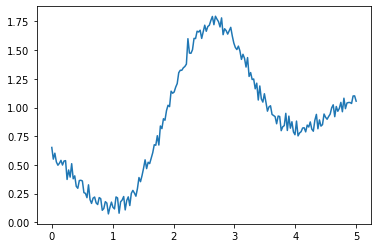

In [59]:
n_sample = 200
# obs_noise = 0
obs_noise = .002
xs = np.linspace(0, 5, n_sample).reshape([-1,1])
K = GaussianKernel(xs, xs)  # covariances
K = K + obs_noise*np.eye(n_sample)
ys = np.random.multivariate_normal(np.zeros(n_sample), K, 1)

plt.plot(xs.T[0], ys[0])

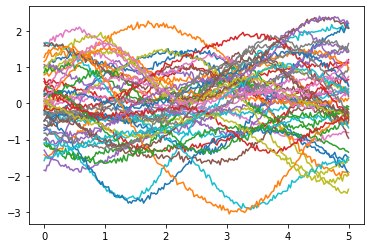

In [60]:
# Collection of functions
gp_sample_n = 50     # number of functions
ys = np.random.multivariate_normal(np.zeros(n_sample), K, gp_sample_n)

for i in range(gp_sample_n):
    plt.plot(xs.T[0], ys[i])


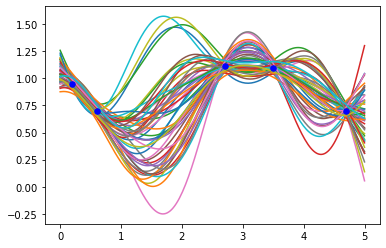

In [61]:
# Posterior function generation
tr_xs = np.array([[.2, .6, 2.7, 3.5, 4.7]]).T
tr_ys = np.array([[.95, .7, 1.11, 1.1, 0.7]]).T

k = GaussianKernel(tr_xs, xs)  # covariances
K = GaussianKernel(tr_xs, tr_xs)
invK = np.linalg.inv(K)

m_fun = np.matmul(np.matmul(k.T, invK), tr_ys).T[0]
k_fun = obs_noise + GaussianKernel(xs, xs) - np.matmul(np.matmul(k.T, invK), k)

ys = np.random.multivariate_normal(m_fun, k_fun, gp_sample_n)

# plt.scatter(tr_xs, tr_ys, s=1000)
for i in range(gp_sample_n):
    plt.plot(xs.T[0], ys[i])
plt.scatter(tr_xs, tr_ys, s=30, c='blue', zorder=5)
plt.show()

Text(0, 0.5, 'y')

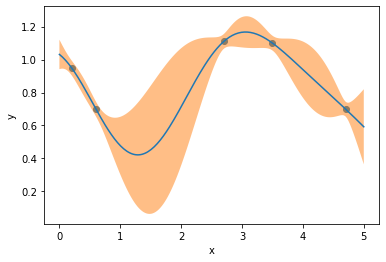

In [62]:
var_test = np.diag(k_fun)

plt.scatter(tr_xs, tr_ys)
plt.plot(xs, m_fun)

plt.fill_between(
    xs.ravel(),
    m_fun.ravel() - np.sqrt(var_test),
    m_fun.ravel() + np.sqrt(var_test),
    alpha=0.5
)
plt.xlabel('x')
plt.ylabel('y')


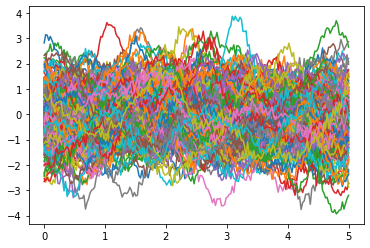

In [71]:
# with different kernel parameters
gp_sample_n = 200

sig=0.3
# sig=1.7
# obs_noise = 0
obs_noise = .02
K = GaussianKernel(xs, xs, sig)  # covariances
K = K + obs_noise*np.eye(n_sample)
ys = np.random.multivariate_normal(np.zeros(n_sample), K, gp_sample_n)

for i in range(gp_sample_n):
    plt.plot(xs.T[0], ys[i])


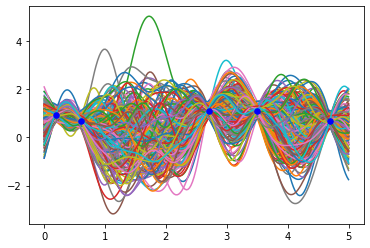

In [72]:
# Posterior function generation
k = GaussianKernel(tr_xs, xs, sig)  # covariances
K = GaussianKernel(tr_xs, tr_xs, sig)
invK = np.linalg.inv(K)

m_fun = np.matmul(np.matmul(k.T, invK), tr_ys).T[0]

sigsq = .1
k_fun = obs_noise + GaussianKernel(xs, xs, sig) - np.matmul(np.matmul(k.T, invK), k)

ys = np.random.multivariate_normal(m_fun, k_fun, gp_sample_n)

for i in range(gp_sample_n):
    plt.plot(xs.T[0], ys[i])
plt.scatter(tr_xs, tr_ys, s=30, c='blue', zorder=5)
plt.show()

Text(0, 0.5, 'y')

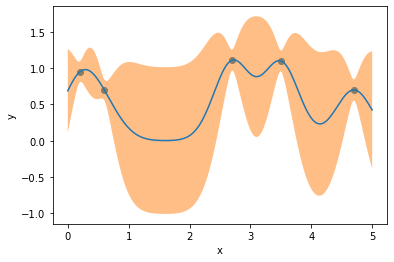

In [73]:
var_test = np.diag(k_fun)

plt.scatter(tr_xs, tr_ys)
plt.plot(xs, m_fun)
plt.fill_between(
    xs.ravel(),
    m_fun.ravel() - np.sqrt(var_test),
    m_fun.ravel() + np.sqrt(var_test),
    alpha=0.5
)
plt.xlabel('x')
plt.ylabel('y')
